## NSE Stock historical price data analysis

### 1. Data Preprocessing and Exploratory Data Analysis
Clean the dataset, handle any missing values or outliers\
Perform statistical analysis on the stock prices and volumes\
Visualize the price trends of the first 10 stocks


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as  sns

In [3]:
file_path = r'C:\Users\wangy\Documents\Completed Courses\Projects_Demonstration\NSE stock price data analysis\nse_all_stock_data (1).csv'
data = pd.read_csv(file_path)

In [4]:
data.head()

,Date,RELIANCE,TCS,HDFCBANK,ICICIBANK,BHARTIARTL,SBIN,INFY,LICI,ITC,...,COOLCAPS,ALLETEC,20MICRONS,VIKASECO,ORIENTBELL,DONEAR,CAREERP,INTLCONV,SHREEPUSHK,PRITIKAUTO
0,1991-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1991-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1991-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1991-01-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1991-01-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
data.shape

(8470, 1418)

In [6]:
data['Date'] = pd.to_datetime(data['Date'])

In [7]:
data['Date']

0      1991-01-02
1      1991-01-03
2      1991-01-04
3      1991-01-07
4      1991-01-08
          ...    
8465   2024-07-01
8466   2024-07-02
8467   2024-07-03
8468   2024-07-04
8469   2024-07-05
Name: Date, Length: 8470, dtype: datetime64[ns]

In [8]:
missing_values =  data.isnull().sum()

In [9]:
missing_percentage = (missing_values/len(data))*100

In [10]:
data_cleaned = data.loc[:,missing_percentage<=50]

In [11]:
missing_values

Date             0
RELIANCE      1310
TCS           3034
HDFCBANK      1307
ICICIBANK     3005
              ... 
DONEAR        4147
CAREERP       5081
INTLCONV      7778
SHREEPUSHK    6297
PRITIKAUTO    7753
Length: 1418, dtype: int64

In [12]:
missing_percentage  

Date           0.000000
RELIANCE      15.466352
TCS           35.820543
HDFCBANK      15.430933
ICICIBANK     35.478158
                ...    
DONEAR        48.961039
CAREERP       59.988194
INTLCONV      91.829988
SHREEPUSHK    74.344746
PRITIKAUTO    91.534829
Length: 1418, dtype: float64

In [13]:
data_cleaned

,Date,RELIANCE,TCS,HDFCBANK,ICICIBANK,BHARTIARTL,SBIN,INFY,ITC,HINDUNILVR,...,JETAIRWAYS,JINDALPHOT,HCL-INSYS,ASMS,NAGAFERT,GEECEE,REMSONSIND,PTL,ORIENTBELL,DONEAR
0,1991-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1991-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1991-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1991-01-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1991-01-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8465,2024-07-01,3120.300049,3978.199951,1705.199951,1211.849976,1454.000000,841.950012,1590.800049,429.049988,2505.100098,...,42.650002,912.000000,16.850000,20.35,12.54,390.950012,203.500000,46.189999,402.799988,134.960007
8466,2024-07-02,3130.350098,4017.399902,1730.599976,1190.599976,1418.949951,826.150024,1621.050049,425.500000,2485.149902,...,42.080002,924.299988,16.920000,20.75,12.16,386.700012,208.059998,46.240002,409.799988,130.729996
8467,2024-07-03,3104.850098,3965.250000,1768.650024,1201.599976,1419.849976,839.950012,1627.400024,428.299988,2510.350098,...,42.040001,913.049988,17.010000,21.16,12.45,387.200012,204.649994,46.270000,429.350006,132.220001
8468,2024-07-04,3108.050049,4020.949951,1727.150024,1233.000000,1423.050049,839.299988,1650.650024,429.049988,2495.949951,...,41.669998,890.200012,16.840000,21.58,12.41,388.700012,214.600006,46.119999,428.750000,131.360001


In [14]:
data_cleaned_info = data_cleaned.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8470 entries, 0 to 8469
Columns: 612 entries, Date to DONEAR
dtypes: datetime64[ns](1), float64(611)
memory usage: 39.5 MB


In [15]:
data_cleaned.isnull().sum()

Date             0
RELIANCE      1310
TCS           3034
HDFCBANK      1307
ICICIBANK     3005
              ... 
GEECEE        4094
REMSONSIND    3003
PTL           4172
ORIENTBELL    4183
DONEAR        4147
Length: 612, dtype: int64

In [16]:
data_filled = data_cleaned.bfill()

In [17]:
data_filled

,Date,RELIANCE,TCS,HDFCBANK,ICICIBANK,BHARTIARTL,SBIN,INFY,ITC,HINDUNILVR,...,JETAIRWAYS,JINDALPHOT,HCL-INSYS,ASMS,NAGAFERT,GEECEE,REMSONSIND,PTL,ORIENTBELL,DONEAR
0,1991-01-02,14.691803,39.700001,2.980000,25.127272,15.681876,18.823240,0.796679,5.583333,61.805000,...,1304.199951,121.370781,19.822678,110.75,6.75,93.849998,9.400000,10.030000,69.550003,214.649994
1,1991-01-03,14.691803,39.700001,2.980000,25.127272,15.681876,18.823240,0.796679,5.583333,61.805000,...,1304.199951,121.370781,19.822678,110.75,6.75,93.849998,9.400000,10.030000,69.550003,214.649994
2,1991-01-04,14.691803,39.700001,2.980000,25.127272,15.681876,18.823240,0.796679,5.583333,61.805000,...,1304.199951,121.370781,19.822678,110.75,6.75,93.849998,9.400000,10.030000,69.550003,214.649994
3,1991-01-07,14.691803,39.700001,2.980000,25.127272,15.681876,18.823240,0.796679,5.583333,61.805000,...,1304.199951,121.370781,19.822678,110.75,6.75,93.849998,9.400000,10.030000,69.550003,214.649994
4,1991-01-08,14.691803,39.700001,2.980000,25.127272,15.681876,18.823240,0.796679,5.583333,61.805000,...,1304.199951,121.370781,19.822678,110.75,6.75,93.849998,9.400000,10.030000,69.550003,214.649994
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8465,2024-07-01,3120.300049,3978.199951,1705.199951,1211.849976,1454.000000,841.950012,1590.800049,429.049988,2505.100098,...,42.650002,912.000000,16.850000,20.35,12.54,390.950012,203.500000,46.189999,402.799988,134.960007
8466,2024-07-02,3130.350098,4017.399902,1730.599976,1190.599976,1418.949951,826.150024,1621.050049,425.500000,2485.149902,...,42.080002,924.299988,16.920000,20.75,12.16,386.700012,208.059998,46.240002,409.799988,130.729996
8467,2024-07-03,3104.850098,3965.250000,1768.650024,1201.599976,1419.849976,839.950012,1627.400024,428.299988,2510.350098,...,42.040001,913.049988,17.010000,21.16,12.45,387.200012,204.649994,46.270000,429.350006,132.220001
8468,2024-07-04,3108.050049,4020.949951,1727.150024,1233.000000,1423.050049,839.299988,1650.650024,429.049988,2495.949951,...,41.669998,890.200012,16.840000,21.58,12.41,388.700012,214.600006,46.119999,428.750000,131.360001


In [18]:
data_filled.isnull().sum()

Date          0
RELIANCE      0
TCS           0
HDFCBANK      0
ICICIBANK     0
             ..
GEECEE        0
REMSONSIND    0
PTL           0
ORIENTBELL    0
DONEAR        0
Length: 612, dtype: int64

In [19]:
def identify_outliers_iqr(df, column):
    Q1 = data_filled[column].quantile(0.25)
    Q3 = data_filled[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data_filled[(data_filled[column] < lower_bound) | (data_filled[column] > upper_bound)]
    return outliers

# Apply the function to each stock price column
outliers_iqr = {}
for column in data_filled.columns:
    if column != 'Date':
        outliers_iqr[column] = identify_outliers_iqr(data_filled, column)


In [20]:
# Calculate Q1, Q3, and IQR for each stock price column
Q1 = data_filled.quantile(0.25)
Q3 = data_filled.quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Cap outliers at the lower and upper bounds
data_cleaned = data_filled.clip(lower=lower_bound, upper=upper_bound, axis=1)

# Check the cleaned data
data_cleaned_info = data_cleaned.info()
data_cleaned_info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8470 entries, 0 to 8469
Columns: 612 entries, Date to DONEAR
dtypes: datetime64[ns](1), float64(40), object(571)
memory usage: 39.5+ MB


In [21]:
data_cleaned.shape

(8470, 612)

In [22]:
basic_stats = data_filled.describe()

In [23]:
first_10_stocks=data_filled.columns[1:11]

In [24]:
data_cleaned_info=data_filled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8470 entries, 0 to 8469
Columns: 612 entries, Date to DONEAR
dtypes: datetime64[ns](1), float64(611)
memory usage: 39.5 MB


In [25]:
basic_stats

,Date,RELIANCE,TCS,HDFCBANK,ICICIBANK,BHARTIARTL,SBIN,INFY,ITC,HINDUNILVR,...,JETAIRWAYS,JINDALPHOT,HCL-INSYS,ASMS,NAGAFERT,GEECEE,REMSONSIND,PTL,ORIENTBELL,DONEAR
count,8470,8470.000000,8470.000000,8470.000000,8470.000000,8470.000000,8470.000000,8470.000000,8470.000000,8470.000000,...,8470.000000,8470.000000,8470.000000,8470.000000,8470.000000,8470.000000,8470.000000,8470.000000,8470.000000,8470.000000
mean,2007-07-11 12:40:37.969303296,514.448543,798.467475,370.661868,200.478550,237.963422,162.517726,363.667733,114.127340,648.985285,...,795.563177,118.832691,54.664238,76.625256,13.908737,95.317461,14.728617,16.544192,122.100184,130.458937
min,1991-01-02 00:00:00,10.975116,35.474998,2.435000,20.100000,9.350544,13.346102,0.763183,4.182222,61.805000,...,13.650000,7.950000,3.350000,0.500000,2.600000,24.150000,2.020000,3.275000,14.000000,8.900000
25%,1999-02-12 18:00:00,25.584803,39.700001,7.496250,25.127272,15.681876,21.329467,19.350976,14.392500,144.949997,...,314.725006,70.050003,19.822678,12.600000,6.750000,84.300003,5.270000,10.030000,69.550003,31.350000
50%,2007-05-09 12:00:00,298.363907,216.287498,99.955002,113.527271,251.631027,110.849632,197.207817,58.183334,237.464996,...,770.849976,121.370781,19.822678,110.750000,8.650000,93.849998,9.400000,10.030000,69.550003,205.699997
75%,2015-12-06 06:00:00,497.448433,1236.475037,535.462479,256.681824,346.223610,253.587505,496.924988,216.283337,851.274994,...,1304.199951,121.370781,64.520485,110.750000,22.450001,93.849998,9.900000,19.275000,117.000000,214.649994
max,2024-07-05 00:00:00,3177.250000,4219.250000,1768.650024,1233.400024,1475.800049,905.650024,1939.500000,492.149994,2812.449951,...,1375.099976,924.299988,282.798248,283.500000,87.000000,401.250000,214.600006,84.900002,806.200012,236.149994
std,NaN,719.892388,1096.192470,510.729195,249.746445,254.427921,167.137092,457.214896,120.799684,794.411787,...,502.799105,101.980640,56.472196,55.408460,10.745623,41.647104,24.912700,12.051067,124.374667,88.591179


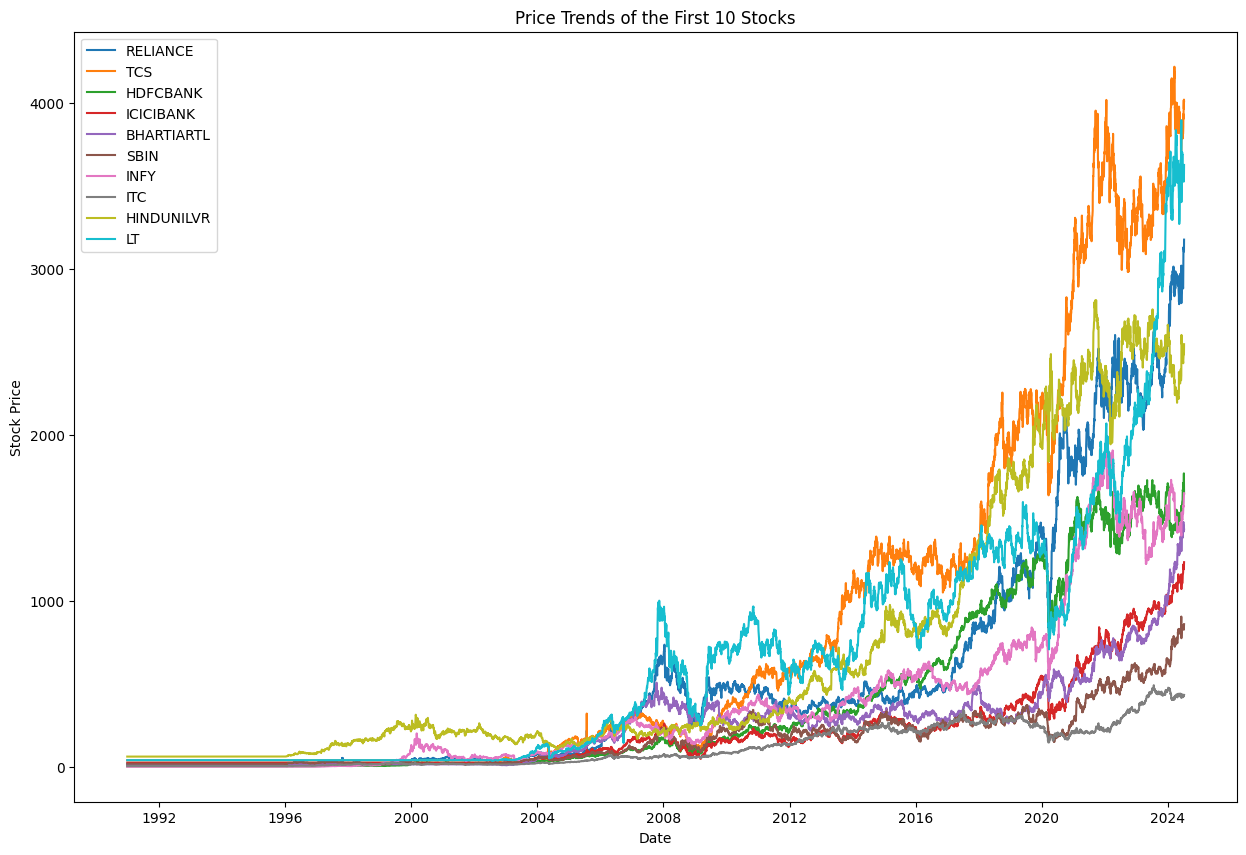

In [26]:
plt.figure(figsize=(15,10))
for stock in first_10_stocks:
    plt.plot(data_filled['Date'],data_filled[stock],label=stock)
    
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.title('Price Trends of the First 10 Stocks')
plt.legend()
plt.show()

# 2.Correlation Analysis
Create a correlation matrix of stock returns\
Identify the most correlated pairs of stocks\
Visualize the correlations using a heatmap


In [27]:
data_filled[first_10_stocks]

,RELIANCE,TCS,HDFCBANK,ICICIBANK,BHARTIARTL,SBIN,INFY,ITC,HINDUNILVR,LT
0,14.691803,39.700001,2.980000,25.127272,15.681876,18.823240,0.796679,5.583333,61.805000,40.435555
1,14.691803,39.700001,2.980000,25.127272,15.681876,18.823240,0.796679,5.583333,61.805000,40.435555
2,14.691803,39.700001,2.980000,25.127272,15.681876,18.823240,0.796679,5.583333,61.805000,40.435555
3,14.691803,39.700001,2.980000,25.127272,15.681876,18.823240,0.796679,5.583333,61.805000,40.435555
4,14.691803,39.700001,2.980000,25.127272,15.681876,18.823240,0.796679,5.583333,61.805000,40.435555
...,...,...,...,...,...,...,...,...,...,...
8465,3120.300049,3978.199951,1705.199951,1211.849976,1454.000000,841.950012,1590.800049,429.049988,2505.100098,3526.550049
8466,3130.350098,4017.399902,1730.599976,1190.599976,1418.949951,826.150024,1621.050049,425.500000,2485.149902,3626.500000
8467,3104.850098,3965.250000,1768.650024,1201.599976,1419.849976,839.950012,1627.400024,428.299988,2510.350098,3614.350098
8468,3108.050049,4020.949951,1727.150024,1233.000000,1423.050049,839.299988,1650.650024,429.049988,2495.949951,3573.300049


In [28]:
returns = data_filled[first_10_stocks].pct_change().dropna()

In [29]:
correlation_matrix = returns.corr()

In [30]:
correlation_matrix

,RELIANCE,TCS,HDFCBANK,ICICIBANK,BHARTIARTL,SBIN,INFY,ITC,HINDUNILVR,LT
RELIANCE,1.000000,0.334207,0.312600,0.323247,0.255303,0.378132,0.243274,0.298100,0.226610,0.214079
TCS,0.334207,1.000000,0.129360,0.198909,0.165686,0.123853,0.208560,0.106972,0.114050,0.121032
HDFCBANK,0.312600,0.129360,1.000000,0.435323,0.246349,0.453585,0.290198,0.319639,0.257731,0.289285
ICICIBANK,0.323247,0.198909,0.435323,1.000000,0.358264,0.522189,0.224409,0.246300,0.215677,0.428387
BHARTIARTL,0.255303,0.165686,0.246349,0.358264,1.000000,0.278240,0.174673,0.186865,0.172131,0.258388
SBIN,0.378132,0.123853,0.453585,0.522189,0.278240,1.000000,0.285193,0.375579,0.276733,0.346659
INFY,0.243274,0.208560,0.290198,0.224409,0.174673,0.285193,1.000000,0.263108,0.219225,0.174273
ITC,0.298100,0.106972,0.319639,0.246300,0.186865,0.375579,0.263108,1.000000,0.332435,0.193286
HINDUNILVR,0.226610,0.114050,0.257731,0.215677,0.172131,0.276733,0.219225,0.332435,1.000000,0.162624
LT,0.214079,0.121032,0.289285,0.428387,0.258388,0.346659,0.174273,0.193286,0.162624,1.000000


In [31]:
correlation_pairs = correlation_matrix.unstack().sort_values(kind="quicksort").drop_duplicates()

In [32]:
most_correlated_pairs = correlation_pairs[correlation_pairs!=1].nlargest(10)

In [33]:
most_correlated_pairs_df=most_correlated_pairs.reset_index()
most_correlated_pairs_df

,level_0,level_1,0
0,SBIN,ICICIBANK,0.522189
1,HDFCBANK,SBIN,0.453585
2,HDFCBANK,ICICIBANK,0.435323
3,LT,ICICIBANK,0.428387
4,RELIANCE,SBIN,0.378132
5,ITC,SBIN,0.375579
6,BHARTIARTL,ICICIBANK,0.358264
7,LT,SBIN,0.346659
8,TCS,RELIANCE,0.334207
9,HINDUNILVR,ITC,0.332435


In [34]:
correlation_matrix.isnull().sum()

RELIANCE      0
TCS           0
HDFCBANK      0
ICICIBANK     0
BHARTIARTL    0
SBIN          0
INFY          0
ITC           0
HINDUNILVR    0
LT            0
dtype: int64

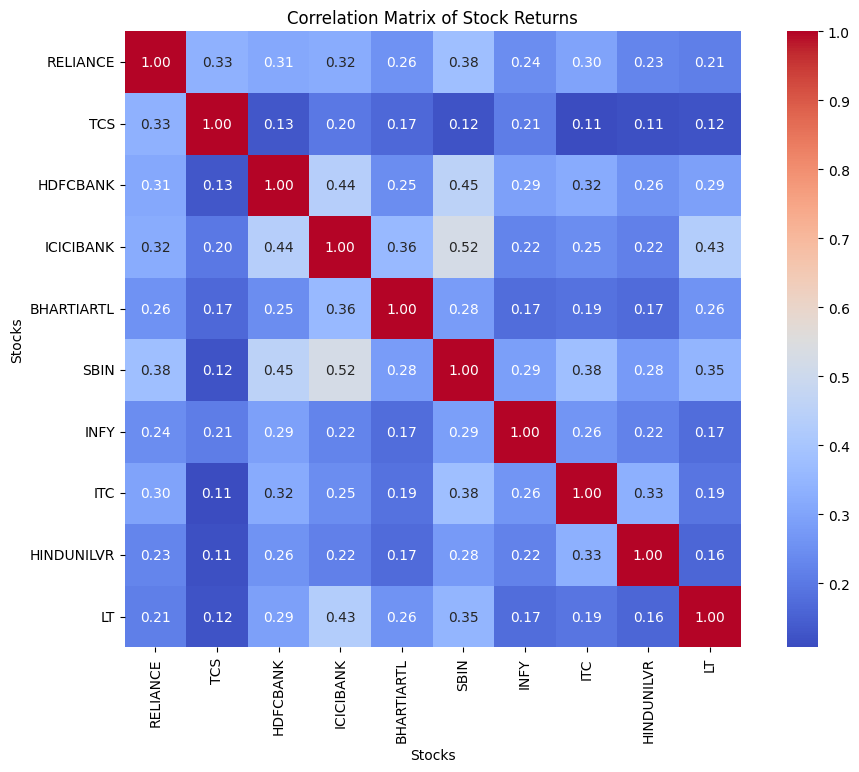

In [35]:
plt.figure(figsize=(12,8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm',square=True)
plt.title('Correlation Matrix of Stock Returns')
plt.xlabel('Stocks')
plt.ylabel('Stocks')
plt.show()

# Positive Correlation Insights
Stock Movement: Stocks with high positive correlations, such as RELIANCE and TCS, generally tend to move in the same direction. This is often due to similar industry impacts or financial factors.

Sector Similarity: High positive correlations often indicate that the companies belong to the same sector or are influenced by similar market conditions.

# Negative Correlation Insights
Risk Reduction: Stocks with negative correlations, like RELIANCE and HINDUNILVR, move in opposite directions. This can help balance the portfolio and reduce overall risk.

Diversification: Including negatively correlated stocks can protect against market volatility, as gains in one can offset losses in another.

# Diversification Strategies
Asset Variety: Invest in a mix of asset classes (stocks, bonds, real estate) to spread risk.

Geographic Spread: Diversify investments across different regions to mitigate local economic downturns.

# Portfolio Optimization
Efficient Frontier: Use tools like mean-variance optimization to find the best risk-return balance.

Risk Management: Incorporate assets with varying risk levels to customize risk tolerance and investment goals.

# 3.Time Series Decomposition
Choose one stock and perform time series decomposition\
Identify trend, seasonality, and residual components\
Interpret the results and their implications for trading

In [36]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [37]:
stock='SBIN'

In [38]:
decomposition=seasonal_decompose(data_filled[stock].dropna(),model='multiplicative',period=365)

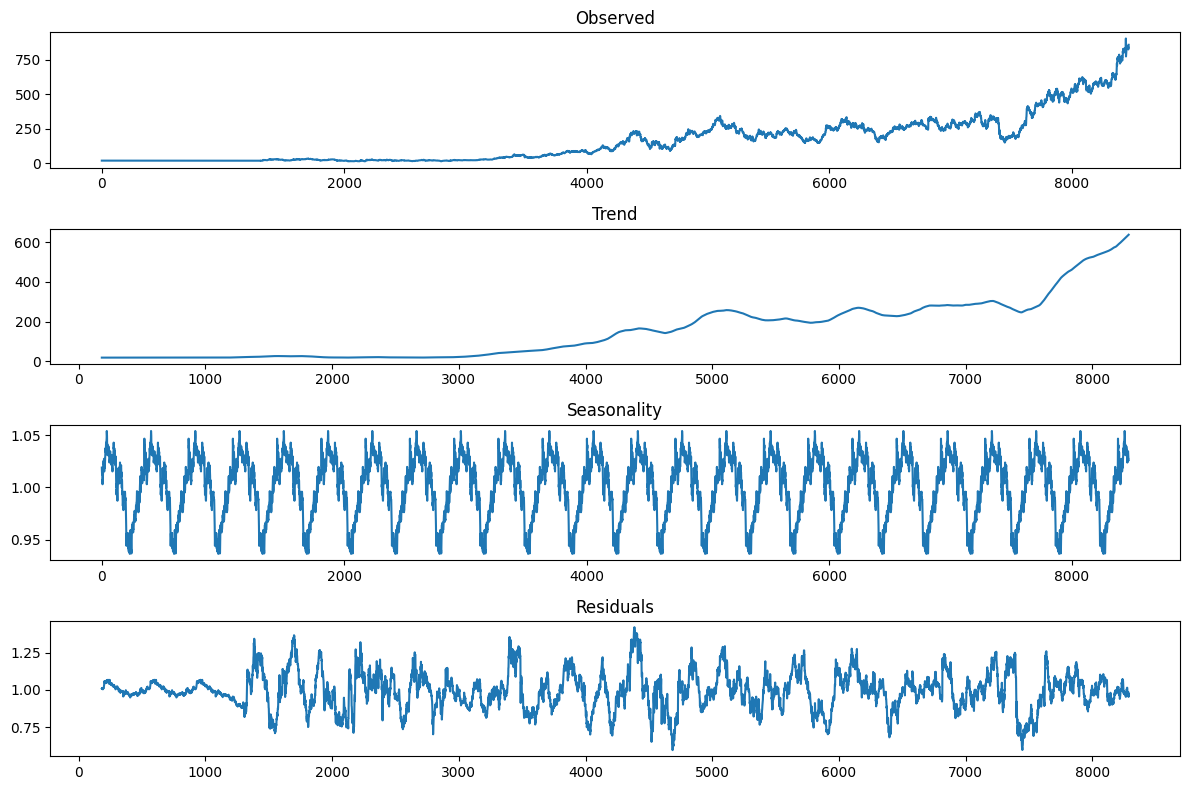

In [39]:
plt.figure(figsize=(12,8))
plt.subplot(411)
plt.plot(decomposition.observed)
plt.title('Observed')

plt.subplot(412)
plt.plot(decomposition.trend)
plt.title('Trend')

plt.subplot(413)
plt.plot(decomposition.seasonal)
plt.title('Seasonality')

plt.subplot(414)
plt.plot(decomposition.resid)
plt.title('Residuals')

plt.tight_layout()
plt.show()

# Return the decomposed components for further analysis
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

### Interpret the Results and Their Implications for Trading

#### Interpretation:  
Observed: The real statistics show an overall upward trend from 1992 to beyond 2020.\
Trend: A consistent upward trajectory indicates long-term growth in value.\
Seasonality: Regular oscillating patterns suggest predictable cyclical changes.\
Residuals: Random fluctuations around a central axis represent noise or irregularities.\

#### Implications for Trading:
Bullish Conditions: The upward trend in both the observed data and trend component indicates long-term growth in value, suggesting bullish market conditions.\
Cyclical Opportunities: The seasonality component can help identify cyclical buying or selling opportunities.\
Risk Management: Residuals highlight unexpected events or outliers, which can inform risk management strategies.

# 4. Anomaly Detection
Develop a Method: Create a strategy to detect anomalous price movements.\
Identify Anomalies: Identify and list the top 5 most significant anomalies in the dataset.\
Investigate Causes: Investigate and explain the possible reasons for these anomalies.

In [40]:
data_filled.reset_index(inplace=True)

In [41]:
# data_filled.to_csv('Data_filled.csv',index=False)

In [42]:
data_filled

,index,Date,RELIANCE,TCS,HDFCBANK,ICICIBANK,BHARTIARTL,SBIN,INFY,ITC,...,JETAIRWAYS,JINDALPHOT,HCL-INSYS,ASMS,NAGAFERT,GEECEE,REMSONSIND,PTL,ORIENTBELL,DONEAR
0,0,1991-01-02,14.691803,39.700001,2.980000,25.127272,15.681876,18.823240,0.796679,5.583333,...,1304.199951,121.370781,19.822678,110.75,6.75,93.849998,9.400000,10.030000,69.550003,214.649994
1,1,1991-01-03,14.691803,39.700001,2.980000,25.127272,15.681876,18.823240,0.796679,5.583333,...,1304.199951,121.370781,19.822678,110.75,6.75,93.849998,9.400000,10.030000,69.550003,214.649994
2,2,1991-01-04,14.691803,39.700001,2.980000,25.127272,15.681876,18.823240,0.796679,5.583333,...,1304.199951,121.370781,19.822678,110.75,6.75,93.849998,9.400000,10.030000,69.550003,214.649994
3,3,1991-01-07,14.691803,39.700001,2.980000,25.127272,15.681876,18.823240,0.796679,5.583333,...,1304.199951,121.370781,19.822678,110.75,6.75,93.849998,9.400000,10.030000,69.550003,214.649994
4,4,1991-01-08,14.691803,39.700001,2.980000,25.127272,15.681876,18.823240,0.796679,5.583333,...,1304.199951,121.370781,19.822678,110.75,6.75,93.849998,9.400000,10.030000,69.550003,214.649994
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8465,8465,2024-07-01,3120.300049,3978.199951,1705.199951,1211.849976,1454.000000,841.950012,1590.800049,429.049988,...,42.650002,912.000000,16.850000,20.35,12.54,390.950012,203.500000,46.189999,402.799988,134.960007
8466,8466,2024-07-02,3130.350098,4017.399902,1730.599976,1190.599976,1418.949951,826.150024,1621.050049,425.500000,...,42.080002,924.299988,16.920000,20.75,12.16,386.700012,208.059998,46.240002,409.799988,130.729996
8467,8467,2024-07-03,3104.850098,3965.250000,1768.650024,1201.599976,1419.849976,839.950012,1627.400024,428.299988,...,42.040001,913.049988,17.010000,21.16,12.45,387.200012,204.649994,46.270000,429.350006,132.220001
8468,8468,2024-07-04,3108.050049,4020.949951,1727.150024,1233.000000,1423.050049,839.299988,1650.650024,429.049988,...,41.669998,890.200012,16.840000,21.58,12.41,388.700012,214.600006,46.119999,428.750000,131.360001


In [43]:
data_10_stocks=data_filled[first_10_stocks]

In [44]:
data_10_stocks.set_index(data_filled['Date'], inplace=True)

data_10_stocks

,RELIANCE,TCS,HDFCBANK,ICICIBANK,BHARTIARTL,SBIN,INFY,ITC,HINDUNILVR,LT
Date,,,,,,,,,,
1991-01-02,14.691803,39.700001,2.980000,25.127272,15.681876,18.823240,0.796679,5.583333,61.805000,40.435555
1991-01-03,14.691803,39.700001,2.980000,25.127272,15.681876,18.823240,0.796679,5.583333,61.805000,40.435555
1991-01-04,14.691803,39.700001,2.980000,25.127272,15.681876,18.823240,0.796679,5.583333,61.805000,40.435555
1991-01-07,14.691803,39.700001,2.980000,25.127272,15.681876,18.823240,0.796679,5.583333,61.805000,40.435555
1991-01-08,14.691803,39.700001,2.980000,25.127272,15.681876,18.823240,0.796679,5.583333,61.805000,40.435555
...,...,...,...,...,...,...,...,...,...,...
2024-07-01,3120.300049,3978.199951,1705.199951,1211.849976,1454.000000,841.950012,1590.800049,429.049988,2505.100098,3526.550049
2024-07-02,3130.350098,4017.399902,1730.599976,1190.599976,1418.949951,826.150024,1621.050049,425.500000,2485.149902,3626.500000
2024-07-03,3104.850098,3965.250000,1768.650024,1201.599976,1419.849976,839.950012,1627.400024,428.299988,2510.350098,3614.350098


In [46]:
import numpy as np

# Function to detect anomalies using Bollinger Bands
def detect_anomalies_bb(data, window=20, std_dev_multiplier=2):
    rolling_mean = data.rolling(window=window).mean()
    rolling_std = data.rolling(window=window).std()

    upper_band = rolling_mean + (std_dev_multiplier * rolling_std)
    lower_band = rolling_mean - (std_dev_multiplier * rolling_std)

    anomalies = pd.DataFrame(index=data.index)
    anomalies['price'] = data
    anomalies['anomaly'] = (data > upper_band) | (data < lower_band)
    anomalies['deviation'] = np.abs(data - rolling_mean)
    return anomalies[anomalies['anomaly']]

# Assuming `stocks` is a DataFrame with each column representing a different stock's price data
anomalies_by_stock = {}
for col in data_10_stocks.columns:
    anomalies_by_stock[col] = detect_anomalies_bb(data_10_stocks[col])

# Combine anomalies from all stocks into a single DataFrame
all_anomalies = pd.concat(anomalies_by_stock, keys=data_10_stocks.columns, names=['Stock', 'Date'])

# Find the top 5 most significant anomalies across all stocks
top_5_anomalies = all_anomalies.nlargest(5, 'deviation')
top_5_anomalies_df=top_5_anomalies.reset_index()
print(top_5_anomalies_df)


        Stock       Date        price  anomaly   deviation
0          LT 2024-06-03  3897.149902     True  388.149902
1         TCS 2020-03-17  1658.000000     True  366.585010
2         TCS 2020-03-16  1696.400024     True  354.494983
3  HINDUNILVR 2020-04-08  2460.850098     True  352.405103
4          LT 2020-03-23   724.049988     True  351.937509


**Top 5 Anomalies:**

| Date       | Stock       | Price         | Anomaly | Deviation     | Possible Reasons                                  |
|------------|-------------|---------------|---------|---------------|---------------------------------------------------|
| 2024-06-03 | LT          | 3897.149902   | True    | 388.149902    | LT’s stock price surged due to a major contract win, positive quarterly earnings report, and favorable government policies boosting infrastructure spending. |
| 2020-03-17 | TCS         | 1658.000000   | True    | 366.585010    | Market crash during COVID-19 pandemic, causing volatility and panic selling. |
| 2020-03-16 | TCS         | 1696.400024   | True    | 354.494983    | Continued market volatility amid COVID-19 uncertainty. |
| 2020-04-08 | HINDUNILVR  | 2460.850098   | True    | 352.405103    | Surge in demand for consumer goods and hygiene products during pandemic lockdowns. |
| 2020-03-23 | LT          | 724.049988    | True    | 351.937509    | Market turmoil from COVID-19 impact, leading to sharp declines in stock prices. |
                                            |
